# LEGO ANALYSIS PART 1

### **IMPORTING LIBRARIES**

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


### **GETTING THE DATA**

In [3]:
sets = pd.read_csv('/content/lego_sets.csv')
theme = pd.read_csv('/content/parent_themes.csv')


In [4]:
# CHECKING THE FIRST 5 ROWS FROM SETS DATAFRAME
sets.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [5]:
# CHECKING THE FIRST 5 ROWS FROM THEME DATAFRAME.
theme.head()

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


In [6]:
# Checking the last 5 rows from sets dataframe.
sets.tail()

,set_num,name,year,num_parts,theme_name,parent_theme
11981,NaN,NaN,2014,NaN,NaN,Minecraft
11982,NaN,NaN,2006,NaN,NaN,Super Heroes
11983,NaN,NaN,2017,NaN,NaN,Minecraft
11984,NaN,NaN,2017,8.0,NaN,Super Heroes
11985,NaN,NaN,2003,NaN,NaN,Harry Potter


In [7]:
# Checking the last 5 rows from theme dataframe.
theme.tail()

,id,name,is_licensed
106,605,Nexo Knights,False
107,606,Angry Birds,True
108,607,Ghostbusters,True
109,608,Disney,True
110,610,Brickheadz,False


In [8]:
# Checking data types of each column.
sets.dtypes

set_num          object
name             object
year              int64
num_parts       float64
theme_name       object
parent_theme     object
dtype: object

In [9]:
theme.dtypes

id              int64
name           object
is_licensed      bool
dtype: object

In [10]:
print(sets.shape)
print(theme.shape)

(11986, 6)
(111, 3)


In [11]:
sets.drop_duplicates(inplace=True)
theme.drop_duplicates(inplace=True)

# Q1.WHAT PERCENTAGE OF ALL LISCENSED THEME EVER RELEASED WAS STAR WARS THEME.?

In [12]:
star_wars_df= sets[sets['parent_theme']=='Star Wars']
star_wars_df.head()

,set_num,name,year,num_parts,theme_name,parent_theme
44,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars
45,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars
54,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars
57,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars
116,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars


In [13]:
liscense_df = theme[theme['is_licensed']==True].reset_index()
liscense_df.head()

,index,id,name,is_licensed
0,7,158,Star Wars,True
1,12,246,Harry Potter,True
2,16,263,Pirates of the Caribbean,True
3,17,264,Indiana Jones,True
4,18,269,Cars,True


## Function to get name of liscensed themes.

In [14]:
def get_name(df,col):
  names=[]
  for i in range(len(df)):
    names.append(df[col][i])
  return names


In [15]:
lis_name=get_name(liscense_df,"name")
lis_name

['Star Wars',
 'Harry Potter',
 'Pirates of the Caribbean',
 'Indiana Jones',
 'Cars',
 'Ben 10',
 'Prince of Persia',
 'SpongeBob SquarePants',
 'Toy Story',
 'Avatar',
 "Disney's Mickey Mouse",
 'Super Heroes',
 'The Hobbit and Lord of the Rings',
 'Teenage Mutant Ninja Turtles',
 'The Lone Ranger',
 'Minecraft',
 'Disney Princess',
 'Jurassic World',
 'Scooby-Doo',
 'Angry Birds',
 'Ghostbusters',
 'Disney']

In [16]:
for i in range(len(sets)):
  rows = sets.loc[sets["parent_theme"].isin(lis_name)]

In [17]:
liscensed_df=pd.DataFrame(rows)
liscensed_df

,set_num,name,year,num_parts,theme_name,parent_theme
44,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars
45,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars
54,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars
57,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars
95,10075-1,Spider-Man Action Pack,2002,25.0,Spider-Man,Super Heroes
...,...,...,...,...,...,...
11975,NaN,NaN,2010,442.0,NaN,Harry Potter
11976,NaN,NaN,2012,44.0,NaN,Super Heroes
11978,NaN,NaN,2004,485.0,NaN,Super Heroes
11979,NaN,NaN,2016,561.0,NaN,Super Heroes


In [18]:
SW=star_wars_df['set_num'].count()
Total_lisenced_sets = liscensed_df['set_num'].count()
percentage_of_star_wars_sets = SW / Total_lisenced_sets * 100
int(percentage_of_star_wars_sets)

51

**OUTPUT:**
**THUS 51% OF LISCENSED THEMES EVER RELEASED WHERE STAR WARS.**

#Q2. In which year star wars was not the most popular lisenced theme in terms of number of sets released that year

In [19]:
sets.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [20]:
liscensed_df['count']=1
liscensed_df.sort_values(by='year')
data=liscensed_df.groupby(['year','parent_theme'])['count'].sum().reset_index()
data.head()


,year,parent_theme,count
0,1999,Star Wars,13
1,2000,Disney's Mickey Mouse,5
2,2000,Star Wars,26
3,2001,Harry Potter,13
4,2001,Star Wars,14


In [21]:
data.sort_values('count',ascending=False).drop_duplicates(['year'])

,year,parent_theme,count
82,2017,Super Heroes,92
76,2016,Star Wars,61
67,2015,Star Wars,58
59,2014,Star Wars,45
47,2012,Star Wars,43
32,2009,Star Wars,39
52,2013,Star Wars,35
42,2011,Star Wars,32
9,2003,Star Wars,32
36,2010,Star Wars,30


**OUTPUT: IN THE YEAR 2017 STAR WARS WAS NOT THE MOST POPULAR.**

#Q3. Break down number of sets per year

In [22]:
clean_df = sets[~sets['set_num'].isnull()].reset_index()
clean_df['count']=1
clean_df.head()

,index,set_num,name,year,num_parts,theme_name,parent_theme,count
0,0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,1
1,1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,1
2,2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,1
3,3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,1
4,4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,1


In [23]:
sets_per_year=clean_df.groupby('year')['count'].sum().reset_index()
with pd.option_context("display.max_rows", None):
  print(sets_per_year)

    year  count
0   1950      7
1   1953      4
2   1954     14
3   1955     28
4   1956     12
5   1957     21
6   1958     42
7   1959      4
8   1960      3
9   1961     17
10  1962     40
11  1963     18
12  1964     11
13  1965     10
14  1966     89
15  1967     21
16  1968     25
17  1969     69
18  1970     29
19  1971     45
20  1972     38
21  1973     68
22  1974     39
23  1975     31
24  1976     68
25  1977     92
26  1978     73
27  1979     82
28  1980     88
29  1981     79
30  1982     76
31  1983     57
32  1984     76
33  1985    139
34  1986    123
35  1987    209
36  1988     68
37  1989    114
38  1990     85
39  1991    106
40  1992    115
41  1993    111
42  1994    128
43  1995    128
44  1996    144
45  1997    194
46  1998    325
47  1999    300
48  2000    327
49  2001    339
50  2002    447
51  2003    415
52  2004    371
53  2005    330
54  2006    283
55  2007    319
56  2008    349
57  2009    403
58  2010    444
59  2011    502
60  2012    615
61  2013

# LEGO DATA ANALYSIS PART 2.

# **LEGO DATA MODEL.**

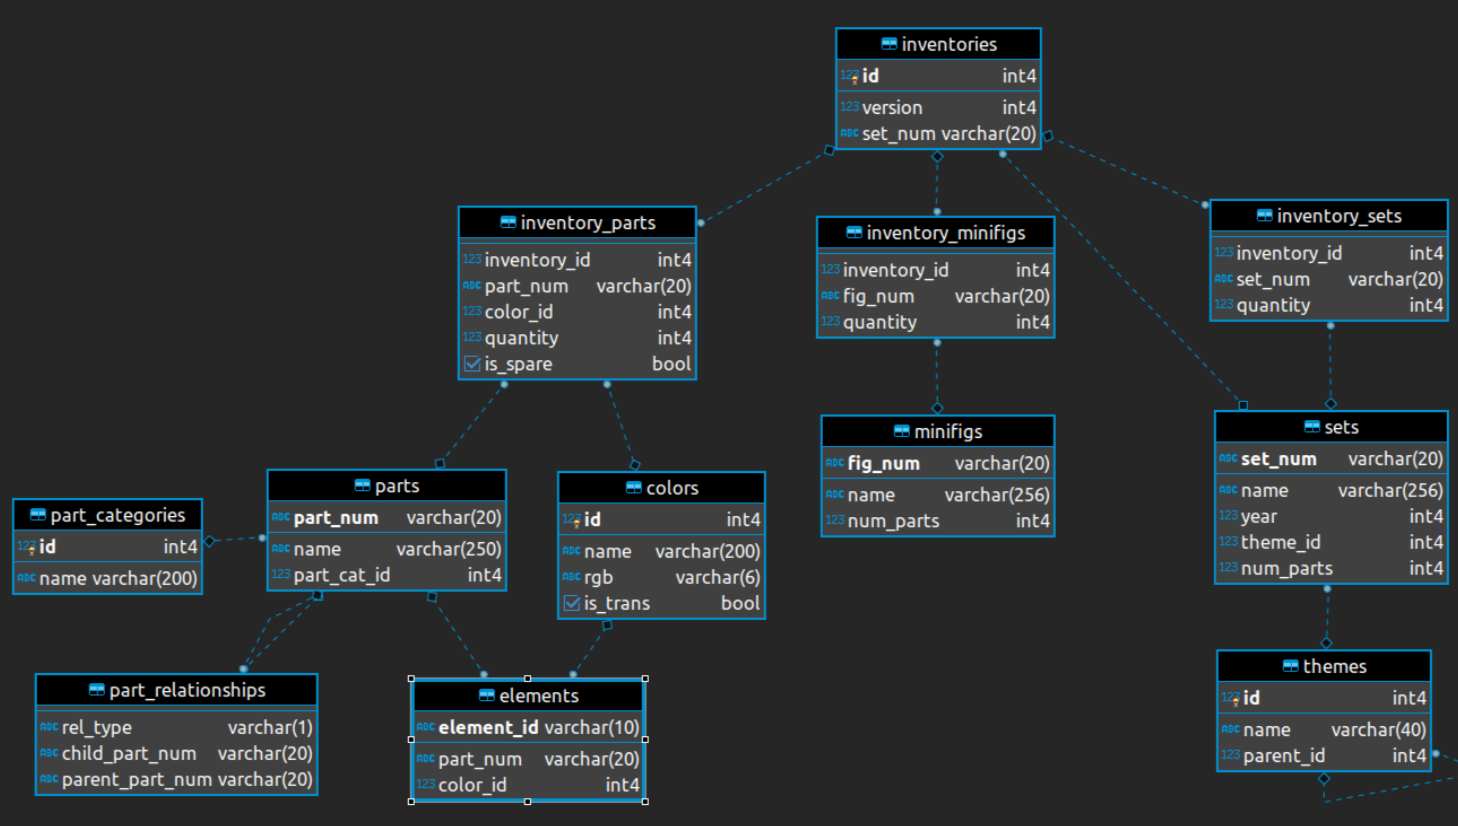

## **GETTING DATA**

In [24]:
sets_df = pd.read_csv('/content/sets.csv')
themes_df = pd.read_csv('/content/themes.csv')

In [25]:
# Checking first 5 records.
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


### **GETTING FAMALARIZED WITH DATA**

In [26]:
themes_df.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [27]:
# Checking last 5 recors.
sets_df.tail()

,set_num,name,year,theme_id,num_parts
11668,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,408,15
11669,WHITEHOUSE-1,Micro White House,2015,598,59
11670,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,408,146
11671,WishingWell-1,Wishing Well [Toys R Us Promo],2013,494,28
11672,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,3


In [28]:
themes_df.tail()

,id,name,parent_id
609,610,Brickheadz,NaN
610,611,Series 17 Minifigures,535.0
611,612,Star Wars Episode 8,158.0
612,613,Freemakers,158.0
613,614,Jungle,52.0


In [29]:
# Checking data types.
sets_df.dtypes

set_num      object
name         object
year          int64
theme_id      int64
num_parts     int64
dtype: object

In [30]:
themes_df.dtypes

id             int64
name          object
parent_id    float64
dtype: object

In [31]:
# Checking for null records.
sets_df.isnull().sum()

set_num      0
name         0
year         0
theme_id     0
num_parts    0
dtype: int64

In [32]:
themes_df.isnull().sum()

id             0
name           0
parent_id    111
dtype: int64

In [33]:
# Checking for duplicates
sets_df.duplicated().sum()

0

In [34]:
themes_df.duplicated().sum()

0

In [35]:
# Checking the number of rows and columns.
print(sets_df.shape)
print(themes_df.shape)


(11673, 5)
(614, 3)


In [36]:
sets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11673 entries, 0 to 11672
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    11673 non-null  object
 1   name       11673 non-null  object
 2   year       11673 non-null  int64 
 3   theme_id   11673 non-null  int64 
 4   num_parts  11673 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 456.1+ KB


In [37]:
themes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         614 non-null    int64  
 1   name       614 non-null    object 
 2   parent_id  503 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.5+ KB


### **MERGE THE DATA**

In [38]:
merged_df = pd.merge(sets_df,themes_df,how='left',left_on='theme_id',right_on='id')
merged_df.head()

,set_num,name_x,year,theme_id,num_parts,id,name_y,parent_id
0,00-1,Weetabix Castle,1970,414,471,414,Castle,411.0
1,0011-2,Town Mini-Figures,1978,84,12,84,Supplemental,67.0
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2,199,Lion Knights,186.0
3,0012-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0
4,0013-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0


In [39]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11673 entries, 0 to 11672
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   set_num    11673 non-null  object 
 1   name_x     11673 non-null  object 
 2   year       11673 non-null  int64  
 3   theme_id   11673 non-null  int64  
 4   num_parts  11673 non-null  int64  
 5   id         11673 non-null  int64  
 6   name_y     11673 non-null  object 
 7   parent_id  8046 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 820.8+ KB


In [40]:
merged_df.rename(columns = {'name_x':'name_set','name_y':'name_theme'}, inplace = True)

In [41]:
merged_df.columns

Index(['set_num', 'name_set', 'year', 'theme_id', 'num_parts', 'id',
       'name_theme', 'parent_id'],
      dtype='object')

In [42]:
# Dropping the duplicate column id which was used for merging.
merged_df.drop(columns=['id'],inplace=True)

In [43]:
merged_df.head(1)

,set_num,name_set,year,theme_id,num_parts,name_theme,parent_id
0,00-1,Weetabix Castle,1970,414,471,Castle,411.0


In [44]:
merged_df.duplicated().sum()

0

In [45]:
merged_df.describe()

,year,theme_id,num_parts,parent_id
count,11673.000000,11673.000000,11673.000000,8046.000000
mean,2001.972758,311.308575,162.262400,269.495401
std,13.475364,177.999101,330.192108,174.060082
min,1950.000000,1.000000,-1.000000,1.000000
25%,1997.000000,161.000000,10.000000,126.000000
50%,2005.000000,324.000000,45.000000,233.000000
75%,2012.000000,470.000000,172.000000,443.000000
max,2017.000000,614.000000,5922.000000,580.000000


Number of parts cannot b -1 so lets replace them with 0

In [46]:
merged_df=merged_df.replace(to_replace=-1,value=np.NaN)
merged_df = merged_df.fillna(0)

In [47]:
merged_df.describe()

,year,theme_id,num_parts,parent_id
count,11673.000000,11673.000000,11673.000000,11673.000000
mean,2001.972758,311.308575,162.262657,185.758588
std,13.475364,177.999101,330.191981,190.888720
min,1950.000000,1.000000,0.000000,0.000000
25%,1997.000000,161.000000,10.000000,0.000000
50%,2005.000000,324.000000,45.000000,126.000000
75%,2012.000000,470.000000,172.000000,365.000000
max,2017.000000,614.000000,5922.000000,580.000000


### **Q1. WHAT IS THE TOTAL NUMBER OF PARTS PER THEME?**

In [48]:
df = merged_df.groupby('name_theme')['num_parts'].sum().reset_index()
num_of_parts_per_theme=pd.DataFrame(df)
num_of_parts_per_theme=num_of_parts_per_theme.sort_values(by='num_parts',ascending=False)
num_of_parts_per_theme

,name_theme,num_parts
30,Basic Set,100399.0
307,Star Wars Episode 4/5/6,87694.0
322,Technic,53703.0
67,Construction,52256.0
70,Creator,47755.0
...,...,...
374,Western,3.0
68,Control Lab,2.0
140,Imperial Guards,1.0
250,Samsonite,0.0


### **Q2. WHAT IS THE TOTAL NUMBER OF PARTS PER YEAR**

In [49]:
df1= merged_df.groupby('year')['num_parts'].sum().reset_index()
num_of_parts_per_year = pd.DataFrame(df1)
num_of_parts_per_year=num_of_parts_per_year.sort_values(by='num_parts',ascending=False)
num_of_parts_per_year

,year,num_parts
64,2016,150834.0
63,2015,134110.0
62,2014,121007.0
61,2013,107537.0
58,2010,93429.0
...,...,...
4,1956,222.0
2,1954,173.0
0,1950,71.0
1,1953,66.0


### **Q3.HOW MANY SETS WHERE CREATED IN EACH CENTURY IN THE DATASET**

In [50]:
merged_df.head(3)

,set_num,name_set,year,theme_id,num_parts,name_theme,parent_id
0,00-1,Weetabix Castle,1970,414,471.0,Castle,411.0
1,0011-2,Town Mini-Figures,1978,84,12.0,Supplemental,67.0
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2.0,Lion Knights,186.0


In [51]:
unique_years = merged_df['year'].unique()
unique_years

array([1970, 1978, 1987, 1979, 1976, 1965, 1985, 1968, 1999, 1967, 1969,
       2001, 1966, 2003, 2002, 2004, 2006, 2005, 2010, 2007, 2008, 2009,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 1977, 1983, 1986, 1984,
       1973, 1981, 2000, 1980, 1982, 1988, 1997, 1998, 1971, 1955, 1956,
       1957, 1958, 1974, 1972, 1975, 1992, 1991, 1989, 1990, 1993, 1994,
       1996, 1995, 1959, 1962, 1961, 1960, 1963, 1964, 1950, 1953, 1954])

In [52]:
# ADDING A NEW COLUMN CENTURY
merged_df['century']= np.where(merged_df['year']>2000,'21st_century','20th_century')
merged_df['count']=1
merged_df

,set_num,name_set,year,theme_id,num_parts,name_theme,parent_id,century,count
0,00-1,Weetabix Castle,1970,414,471.0,Castle,411.0,20th_century,1
1,0011-2,Town Mini-Figures,1978,84,12.0,Supplemental,67.0,20th_century,1
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2.0,Lion Knights,186.0,20th_century,1
3,0012-1,Space Mini-Figures,1979,143,12.0,Supplemental,126.0,20th_century,1
4,0013-1,Space Mini-Figures,1979,143,12.0,Supplemental,126.0,20th_century,1
...,...,...,...,...,...,...,...,...,...
11668,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,408,15.0,LEGO Brand Store,0.0,21st_century,1
11669,WHITEHOUSE-1,Micro White House,2015,598,59.0,Promotional,0.0,21st_century,1
11670,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,408,146.0,LEGO Brand Store,0.0,21st_century,1
11671,WishingWell-1,Wishing Well [Toys R Us Promo],2013,494,28.0,Friends,0.0,21st_century,1


In [53]:
df2= merged_df.groupby('century')['set_num'].count().reset_index()
num_of_sets_per_year = pd.DataFrame(df2)
num_of_sets_per_year

,century,set_num
0,20th_century,3991
1,21st_century,7682


### **Q4.WHAT PERCENTAGE OF SETS RELEASED IN 21ST CENTURY WHERE TRAINS THEMED**

In [54]:
century_21=merged_df[merged_df['century']=='21st_century']
century_21

,set_num,name_set,year,theme_id,num_parts,name_theme,parent_id,century,count
25,10000-1,Guarded Inn,2001,186,256.0,Castle,0.0,21st_century,1
26,10001-1,Metroliner,2001,233,785.0,Train,0.0,21st_century,1
27,10002-1,Railroad Club Car,2001,233,272.0,Train,0.0,21st_century,1
28,10003-1,1 x 2 Sand Red Bricks,2001,254,100.0,Bulk Bricks,0.0,21st_century,1
29,10004-1,2 x 2 Sand Red Bricks,2001,254,100.0,Bulk Bricks,0.0,21st_century,1
...,...,...,...,...,...,...,...,...,...
11667,Watford-1,"LEGO Store Grand Opening Exclusive Set, Watfor...",2013,408,15.0,LEGO Brand Store,0.0,21st_century,1
11668,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,408,15.0,LEGO Brand Store,0.0,21st_century,1
11669,WHITEHOUSE-1,Micro White House,2015,598,59.0,Promotional,0.0,21st_century,1
11670,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,408,146.0,LEGO Brand Store,0.0,21st_century,1


In [55]:
count_21_cen=century_21['count'].sum()
count_21_cen

7682

In [56]:
century_21_train=merged_df[(merged_df['century']=='21st_century')&(merged_df['name_theme'].str.contains('Train'))]
century_21_train

,set_num,name_set,year,theme_id,num_parts,name_theme,parent_id,century,count
26,10001-1,Metroliner,2001,233,785.0,Train,0.0,21st_century,1
27,10002-1,Railroad Club Car,2001,233,272.0,Train,0.0,21st_century,1
39,10013-1,Open Freight Wagon,2001,238,121.0,My Own Train,236.0,21st_century,1
40,10014-1,Caboose,2001,238,170.0,My Own Train,236.0,21st_century,1
41,10015-1,Passenger Wagon,2001,238,194.0,My Own Train,236.0,21st_century,1
...,...,...,...,...,...,...,...,...,...
11406,KT403-1,Small Train Engine with Tender Blue,2001,238,0.0,My Own Train,236.0,21st_century,1
11407,KT404-1,Small Train Engine with Tender Green,2001,238,0.0,My Own Train,236.0,21st_century,1
11408,KT405-1,Small Train Engine with Tender Black,2001,238,0.0,My Own Train,236.0,21st_century,1
11409,KT406-1,Small Train Engine with Tender Brown,2001,238,0.0,My Own Train,236.0,21st_century,1


In [57]:
count_train=century_21_train['count'].sum()
count_train

78

In [58]:
percentage = (count_train/count_21_cen)*100
percentage

1.0153605831814632

### **Q5.WHAT PERCENTAGE OF SETS RELEASED IN 21ST CENTURY WHERE DISNEY THEMED**

In [59]:
century_21_disney=merged_df[(merged_df['century']=='21st_century')&(merged_df['name_theme'].str.contains('Disney'))]
century_21_disney.head()

,set_num,name_set,year,theme_id,num_parts,name_theme,parent_id,century,count
289,10542-1,Sleeping Beauty's Fairy Tale,2014,579,55.0,Disney Princess,0.0,21st_century,1
2015,30116-1,Rapunzel's Market Visit,2014,579,37.0,Disney Princess,0.0,21st_century,1
2179,30397-1,Olaf's Summertime Fun,2016,579,48.0,Disney Princess,0.0,21st_century,1
2837,3774-1,Bridge,2005,388,26.0,Disney's Mickey Mouse,0.0,21st_century,1
3416,41050-1,Ariel’s Amazing Treasures,2014,579,77.0,Disney Princess,0.0,21st_century,1


In [60]:
percentage=century_21_disney.shape[0]/century_21.shape[0]*100
percentage

0.6118198385837021

### **Q6. WHAT IS THE POPULAR THEME BY YEAR IN TERMS OF SETS RELEASED IN 21ST CENTURY**

In [61]:
df=century_21.groupby(['year','name_theme']).count().reset_index()
df=pd.DataFrame(df)
df=df[['year','name_theme','count']]
df=df.sort_values(by='count',ascending=False)
df=df.drop_duplicates('year')
df


,year,name_theme,count
874,2014,Gear,63
109,2002,Technic,63
715,2012,Friends,58
956,2015,Friends,51
1062,2016,Nexo Knights,51
193,2004,Clikits,51
1097,2017,Batman,44
46,2001,Studios,44
794,2013,Friends,44
663,2011,Ninjago,42


In [62]:
df.shape

(17, 3)

 **THE END**